<a href="https://colab.research.google.com/github/JackSD/Data-Science-Work/blob/master/MINST_Fashion_CNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up 

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [121]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras import backend as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc1


In [122]:
K.image_data_format() 

'channels_last'

downaload the dataset, which is available in Keras 

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [94]:
train_images.shape

(60000, 28, 28)

In [95]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Plotting to visuaze the input data

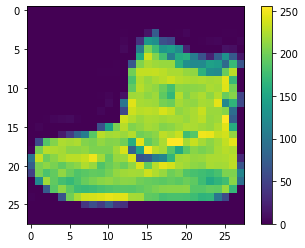

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

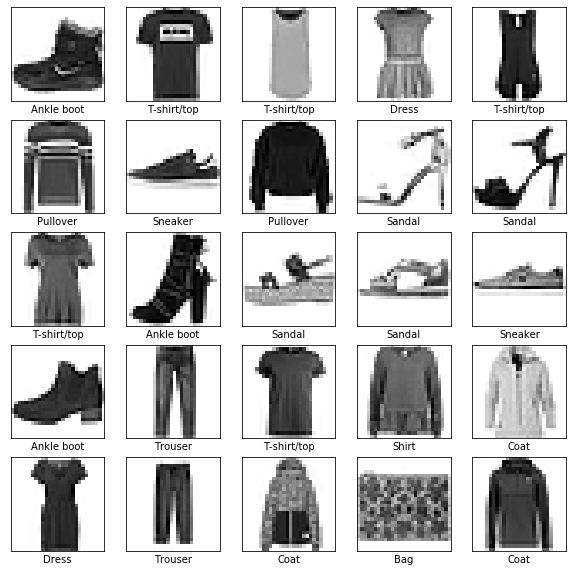

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Experimenting with different network configurations :

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [138]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(248, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 248)               194680    
_________________________________________________________________
dense_44 (Dense)             (None, 10)                2490      
Total params: 197,170
Trainable params: 197,170
Non-trainable params: 0
_________________________________________________________________


In [142]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [131]:
num_filters = 8
filter_size = 3
pool_size = 2

model = keras.Sequential([
    keras.layers.Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=pool_size),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1352)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [123]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1568)            

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

this reshape is needed as the Conv2d expects a 4d input shape

In [0]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))


In [0]:
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [140]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4854 - accuracy: 0.8274
Epoch 2/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3611 - accuracy: 0.8677
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3258 - accuracy: 0.8804
Epoch 4/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3038 - accuracy: 0.8873
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2865 - accuracy: 0.8945
Epoch 6/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2704 - accuracy: 0.8987
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2586 - accuracy: 0.9036
Epoch 8/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2461 - accuracy: 0.9078
Epoch 9/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2380 - accuracy: 0.9105
Epoch 10/

**Results of Different experiments:**

---




1.   Single Layer Perceptron (128 nodes), performance after 10 epochs = 0.9114 Accuracy / 0.8776 Test Accuracy
1.1 Single Layer Perception (248 nodes), performance =  0.9150 / 0.8721
2.   2-Hidden Layer model (2*128 nodes), performance = 0.9120 / 0.8751
3.   2-Hidden Layer model (1*128 nodes, 1*64 Nodes), performance = 0.9098 / test: 0.8828
4. Basic CNN *1 Convolution / 1 maxpool  0.9036 /  0.8840
5. CNN with 2 Convolutional layers, 2 dropout layers  0.9057 / 0.9104



In [141]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3520 - accuracy: 0.8721

Test accuracy: 0.8721


In [0]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([5.2021409e-07, 1.8990687e-07, 6.0087864e-09, 4.3923276e-08,
       6.4579353e-08, 9.8974898e-04, 2.9178873e-06, 2.5834011e-02,
       1.0908914e-08, 9.7317255e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

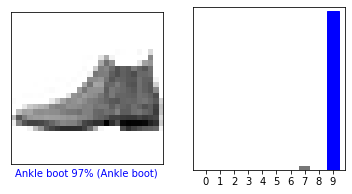

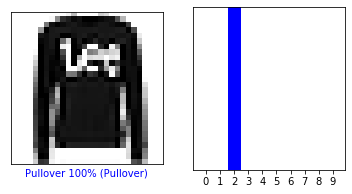

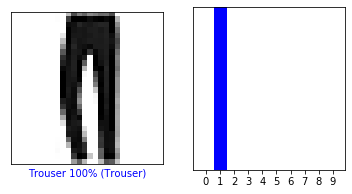

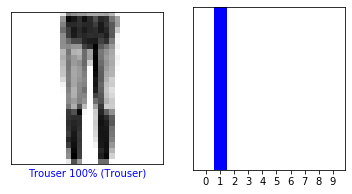

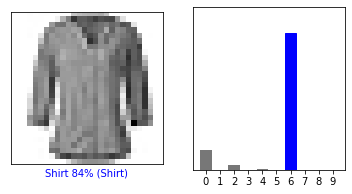

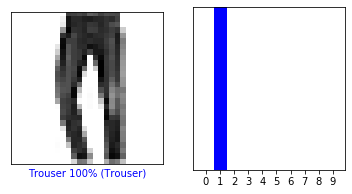

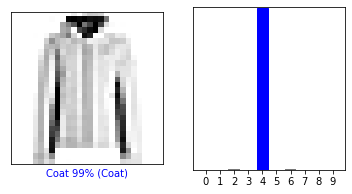

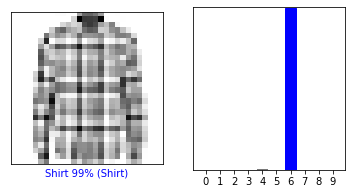

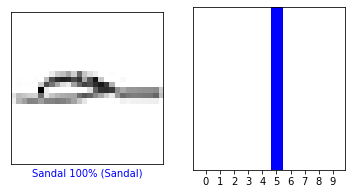

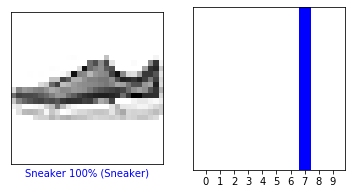

In [31]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
